# Income Prediction Based on Census Income Dataset
## Author: *Wendy Ni*

Target: predict whether the income exceeds 50K per year using Census Income Dataset(also known as "Adult" dataset) extracted by Barry Becker from the 1994 America Census database.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import Data

In [3]:
adult = pd.read_csv('dataset/adult.data', header = None, skipinitialspace=True)
adult_test = pd.read_csv('dataset/adult.test', header = None, skipinitialspace=True, skiprows = [0])

In [4]:
# Examine raw data
adult.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Add column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
             'marital_status', 'occupation', 'relationship', 'race',
            'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
            'native_country', 'income_level']
adult.columns = col_names
adult_test.columns = col_names

In [6]:
adult.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Since the column ***fnlwgt*** represents final weight for the particular record, this is not useful towards predicting the income level and can be dropped. Besides that, ***education*** and ***education_num*** represent the same information in discrete and continuous forms. Considering that education level is ordinal, we drop the categorical ***education*** column to avoid collinearity. Also, we drop ***relationship*** as it is co-determined by ***marital_status*** and ***sex***.

In [7]:
adult = adult.drop(columns = ['fnlwgt', 'education', 'relationship'])
adult_test = adult_test.drop(columns = ['fnlwgt', 'education', 'relationship'])

In [8]:
adult.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_level      object
dtype: object

In [9]:
categorical_vars = ['workclass', 'marital_status', 'occupation', 'race', 'sex', 'native_country']

## Feature Explortation  
Examine some summary statistics about the dataset:

In [10]:
print('The dataset contains', adult.shape[0], 'rows with', adult.shape[1], 'columns.')
print('The test dataset contains', adult_test.shape[0], 'rows with', adult_test.shape[1], 'columns.')

The dataset contains 32561 rows with 12 columns.
The test dataset contains 16281 rows with 12 columns.


In [11]:
adult.describe(include = np.number)

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


The values for ***capital_gain*** and ***capital_loss*** seem suspicious and may require further examination.

In [12]:
adult.describe(include = np.object)

,workclass,marital_status,occupation,race,sex,native_country,income_level
count,32561,32561,32561,32561,32561,32561,32561
unique,9,7,15,5,2,42,2
top,Private,Married-civ-spouse,Prof-specialty,White,Male,United-States,<=50K
freq,22696,14976,4140,27816,21790,29170,24720


In [91]:
print('Percentage of income not exceeding 50K is {:.2%}'.format((adult['income_level'] == '<=50K').sum()/adult.shape[0]))

Percentage of income not exceeding 50K is 75.92%


Visualize the dataset for more insights:

In [13]:
import seaborn as sns

In [14]:
# fig, ax = plt.subplots(ncols = 5, figsize = (20, 8))
# fig.tight_layout(pad = 3.5)
# sns.boxplot(ax = ax[0], y = adult['age'])
# sns.boxplot(ax = ax[1], y = adult['education_num'])
# sns.boxplot(ax = ax[2], y = adult['capital_gain'])
# sns.boxplot(ax = ax[3], y = adult['capital_loss'])
# sns.boxplot(ax = ax[4], y = adult['hours_per_week'])

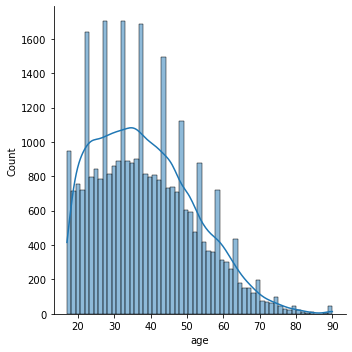

In [69]:
sns.displot(adult['age'], kde = True)

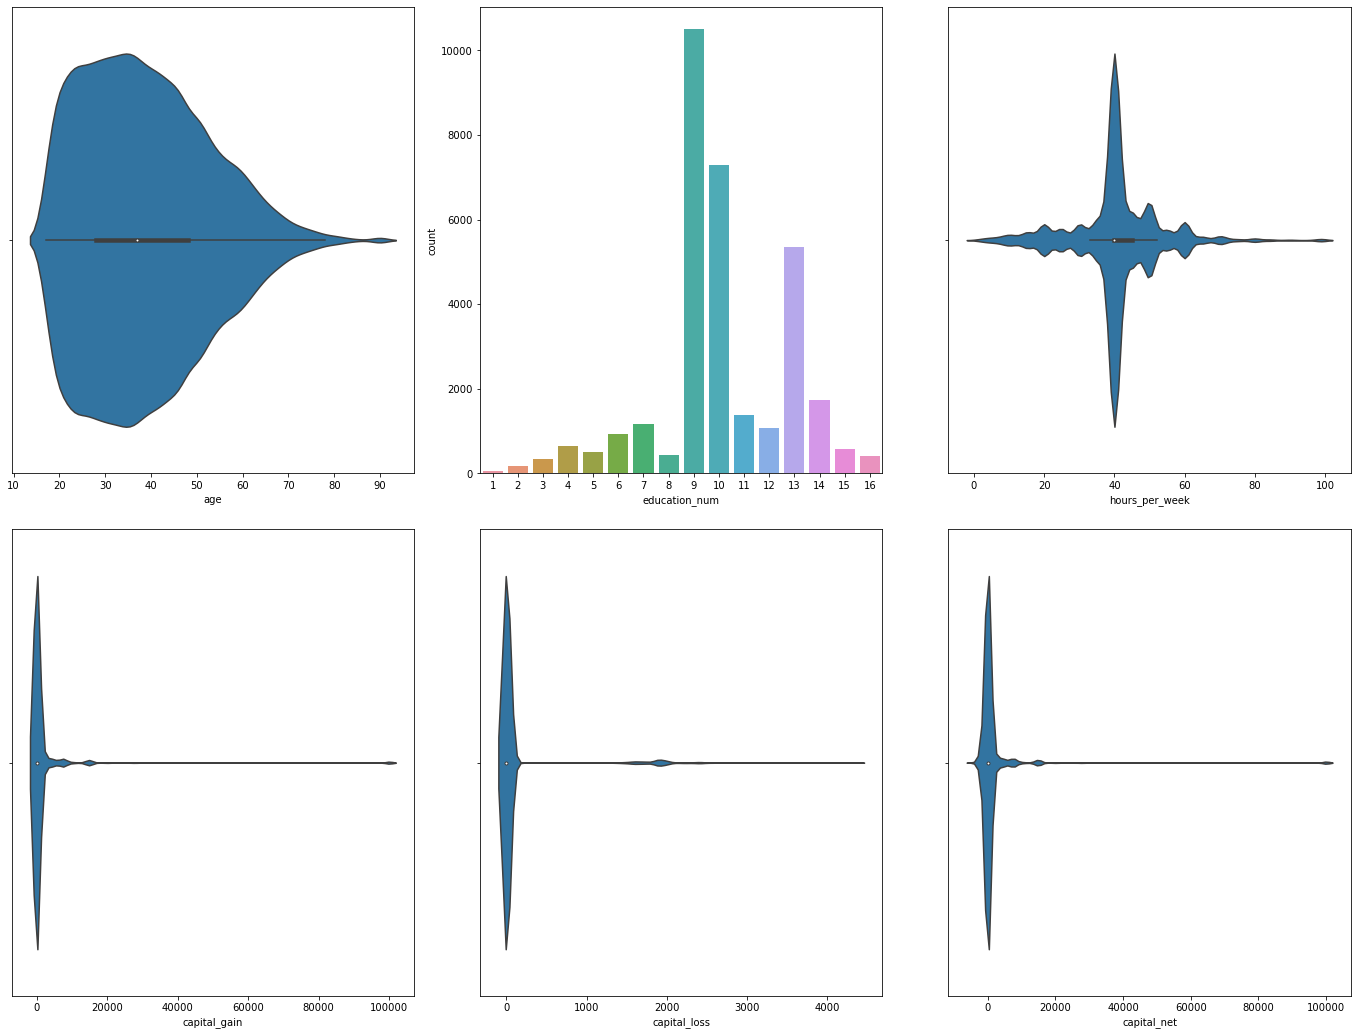

In [84]:
fig, ax = plt.subplots(2,3, figsize = (20, 15))
fig.tight_layout(pad = 3.5)
sns.violinplot(ax = ax[0, 0], x = adult['age'])
sns.countplot(ax = ax[0, 1], x = adult['education_num'])
sns.violinplot(ax = ax[0, 2], x = adult['hours_per_week'])
sns.violinplot(ax = ax[1, 0], x = adult['capital_gain'])
sns.violinplot(ax = ax[1, 1], x = adult['capital_loss'])
sns.violinplot(ax = ax[1, 2], x = adult['capital_gain']-adult['capital_loss'])
ax[1,2].set_xlabel('capital_net')
plt.show()

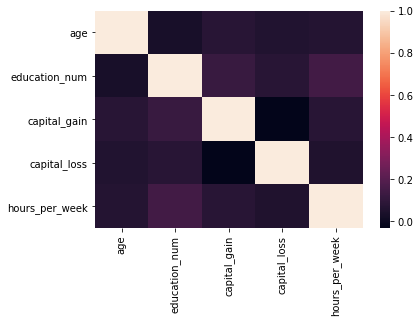

In [71]:
Corr = adult.corr()
sns.heatmap(Corr)

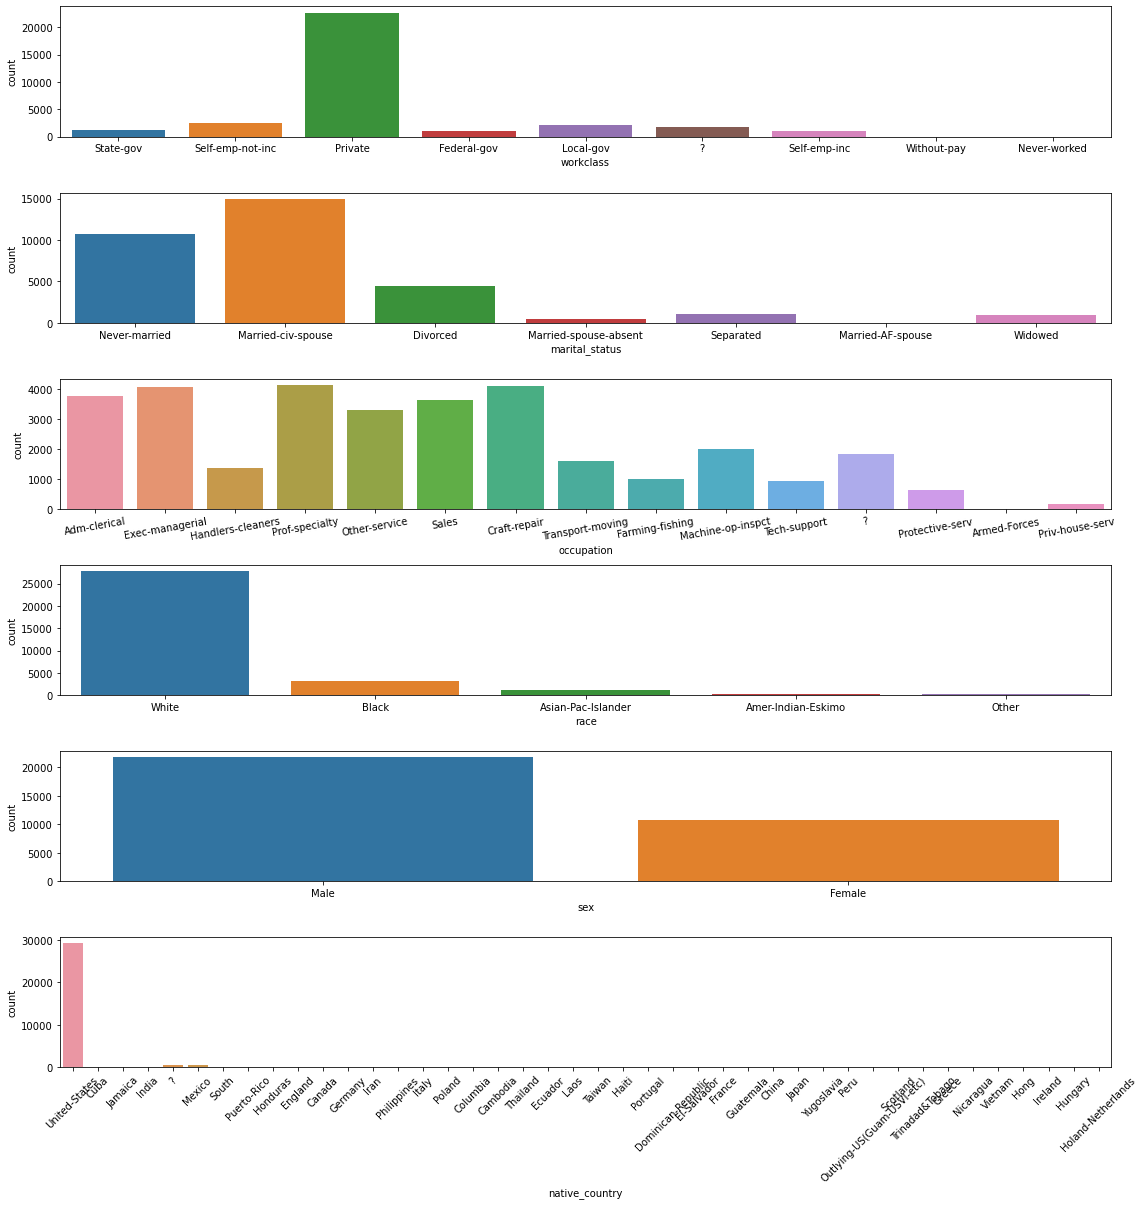

In [95]:
fig, ax = plt.subplots(nrows = 6, figsize = (16, 16))
fig.tight_layout(pad = 3.5)
sns.countplot(ax = ax[0], x = adult['workclass'])
sns.countplot(ax = ax[1], x = adult['marital_status'])
sns.countplot(ax = ax[2], x = adult['occupation'])
sns.countplot(ax = ax[3], x = adult['race'])
sns.countplot(ax = ax[4], x = adult['sex'])
sns.countplot(ax = ax[5], x = adult['native_country'])
ax[2].tick_params(axis='x', labelrotation=10)
ax[5].tick_params(axis='x', labelrotation=45)

## Data Cleaning

First detect for null values:

In [17]:
adult.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

By checking documentation and checking on raw data, unknown values are converted to "?" in this dataset.

In [18]:
null_count = adult[adult == '?'].count(axis = 0)
null_per = (null_count/adult.shape[0]).map(lambda x: '{:,.2%}'.format(x))
pd.concat([null_count, null_per], axis = 1, keys = ['Null Count', 'Null Percentage'])

C:\Users\wendy\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Null Count,Null Percentage
age,0,0.00%
workclass,1836,5.64%
education_num,0,0.00%
marital_status,0,0.00%
occupation,1843,5.66%
race,0,0.00%
sex,0,0.00%
capital_gain,0,0.00%
capital_loss,0,0.00%
hours_per_week,0,0.00%


The dataset is quite clean as there are only 3 columns ***workclass***, ***occupation*** and ***native_country*** containing null values with a relatively small percentage. Given these variables are categorical variables, it is reasonable to keep the null values as a seperate category with the original label. Another solution for ***workclass*** and ***native_country*** is to impute the null values with the mode, as these two variables have dominant categories from the visualizations.  
  
Since most columns do not contain null values, no row needs to be dropped.

Then we perform feature engineering:

Variables ***capital_gain*** and ***capital_loss*** are extremely skewed and of large scale, also, only the difference of the two variables directly contributes to the final classification. It is reasonable to use the diffrence marked as ***capital_net*** and apply normalizing techniques.

In [19]:
# Unsuccessful trial with RobustScaler
#from sklearn.preprocessing import RobustScaler
#capital_net = pd.DataFrame(adult['capital_gain'] - adult['capital_loss'])
#RScaler = RobustScaler()
#capital_net_scaled = RScaler.fit_transform(capital_net)

In [20]:
from sklearn.preprocessing import PowerTransformer
capital_net = pd.DataFrame(adult['capital_gain'] - adult['capital_loss'])
PT = PowerTransformer()
capital_net_scaled = PT.fit_transform(capital_net)

C:\Users\wendy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


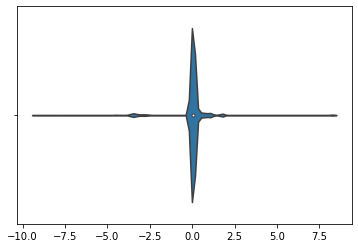

In [100]:
# Boxplot shows that normalization works well
sns.violinplot(capital_net_scaled)

In [22]:
adult_clean = adult.copy(deep = True)
adult_clean.drop(['capital_gain', 'capital_loss'], axis = 1, inplace = True)
adult_clean = pd.concat([adult_clean, pd.DataFrame(capital_net_scaled, columns = ['capital_net'])], axis = 1)

In [23]:
capital_net_test = pd.DataFrame(adult_test['capital_gain'] - adult_test['capital_loss'])
capital_net_test_scaled = PT.transform(capital_net_test)
adult_test_clean = adult_test.copy(deep = True)
adult_test_clean.drop(['capital_gain', 'capital_loss'], axis = 1, inplace = True)
adult_test_clean = pd.concat([adult_test_clean, pd.DataFrame(capital_net_test_scaled, columns = ['capital_net'])], axis = 1)

C:\Users\wendy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


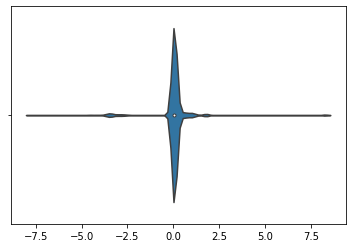

In [101]:
# Normalization also works fine with test data
sns.violinplot(capital_net_test_scaled)

Apply one-hot/label encoding for categorical variables:

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [26]:
#OHE = OneHotEncoder(drop = 'if_binary')
#adult_clean = pd.concat([adult_clean, pd.DataFrame(OHE.fit_transform(adult_clean[categorical_vars]))], axis = 1)

In [27]:
LE = LabelEncoder()
for col in categorical_vars:
    adult_clean.update(pd.Series(LE.fit_transform(adult_clean[col]), name = col))
    adult_test_clean.update(pd.Series(LE.transform(adult_test_clean[col]), name = col))
    adult_clean[col] = adult_clean[col].astype('category')
    adult_test_clean[col] = adult_test_clean[col].astype('category')

In [28]:
adult_clean.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income_level,capital_net
0,39,7,13,4,1,4,1,40,39,<=50K,0.402501
1,50,6,13,2,4,4,1,13,39,<=50K,0.044772
2,38,4,9,0,6,4,1,40,39,<=50K,0.044772
3,53,4,7,2,6,2,1,40,39,<=50K,0.044772
4,28,4,13,2,10,2,0,40,5,<=50K,0.044772


In [29]:
adult_test_clean.head()

,age,workclass,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income_level,capital_net
0,25,4,7,4,7,2,1,40,39,<=50K.,0.044772
1,38,4,9,2,5,4,1,50,39,<=50K.,0.044772
2,28,2,12,2,11,4,1,40,39,>50K.,0.044772
3,44,4,10,2,7,2,1,40,39,>50K.,1.051046
4,18,0,10,4,0,4,0,30,39,<=50K.,0.044772


Map ***income_level*** "<=50K" to 0, ">50K" to 1:

In [30]:
adult_clean['income_level'].replace('<=50K', 0, inplace = True)
adult_clean['income_level'].replace('>50K', 1, inplace = True)
adult_test_clean['income_level'].replace('<=50K.', 0, inplace = True)
adult_test_clean['income_level'].replace('>50K.', 1, inplace = True)

In [31]:
# Fix the name for selected preprocessed data
adult_final = adult_clean
adult_test_final = adult_test_clean

In [32]:
y = adult_final['income_level']
X = adult_final.drop(['income_level'], axis = 1)
y_test = adult_test_final['income_level']
X_test = adult_test_final.drop(['income_level'], axis = 1)

Prepare data for model fitting and testing:

In [33]:
# # # For CV use
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# For reslt testing
X_train, y_train = X, y

## Baseline Model Fitting

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

### Logistic Regression

Simplest model used as a baseline for model prediction accuracy.

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print('Accuracy score for Logistic Regression is', '{:.4f}'.format(acc_logreg))

Accuracy score for Logistic Regression is 0.8015


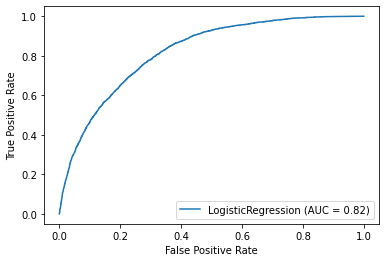

In [144]:
auc_logreg = plot_roc_curve(logreg, X_test, y_test).roc_auc

### SVM

In [38]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly', gamma = 'scale', random_state = 42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print('Accuracy score for SVM is', '{:.4f}'.format(acc_svc))

Accuracy score for SVM is 0.8081


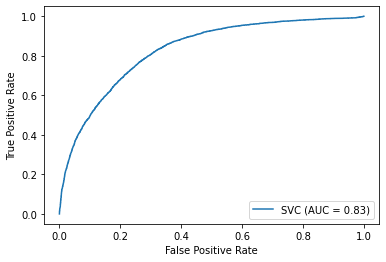

In [146]:
auc_svc = plot_roc_curve(svc, X_test, y_test).roc_auc

SVM performs slightly better than logistic regression, suggesting that nonlinear models might perfrom better.

## Advanced ML Classification Models

In [40]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [106]:
# Use GridSearchCV to tune the parameters
DT_clf = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                     {
                         'criterion' : ['gini', 'entropy'],
                         'max_depth' : [5, 10, 20, 50, 100],
                         'min_samples_split' : [None, 10, 20, 30, 50],
                     }, cv = 5, scoring = 'roc_auc', verbose = 2, n_jobs = -1
                     )

In [107]:
DT_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50, 100],
                         'min_samples_split': [None, 10, 20, 30, 50]},
             scoring='roc_auc', verbose=2)

In [127]:
print('Best ROC AUC score for Decision Tree using CV is', '{:.4f}'.format(DT_clf.best_score_))
print('Best Decision Tree model is', DT_clf.best_estimator_)

Best ROC AUC score for Decision Tree using CV is 0.9067
Best Decision Tree model is DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)


In [128]:
# Fix the best model and produce predicted values
DT_best = DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=42)
DT_best.fit(X_train, y_train)
y_pred_DT = DT_best.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_DT)
print('Accuracy score for Decision Tree is', '{:.4f}'.format(acc_DT))

Accuracy score for Decision Tree is 0.8582


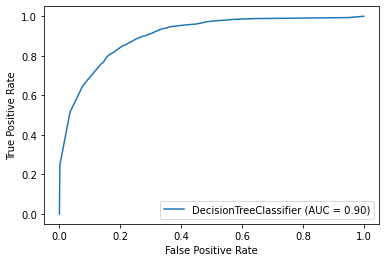

In [147]:
auc_DT = plot_roc_curve(DT_best, X_test, y_test).roc_auc

In [112]:
# Create Visualization for the best model
import graphviz 
DT_vis = export_graphviz(DT_best, out_file=None, feature_names = X.columns,
                         class_names = ['<=50K', '>50K'], filled = True,
                         rounded = True) 
graph = graphviz.Source(DT_vis) 
graph.render('Decision Tree', view = True) 

'Decision Tree.pdf'

From the visulization we can see that the unbalanced proportion between target groups may need to be tackled as it results in an unbalanced tree that is not very efficient.

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RF_clf = GridSearchCV(RandomForestClassifier(random_state = 42, oob_score = True),
                     {
                         'n_estimators' : [10, 20, 50, 100],
                         'criterion' : ['gini', 'entropy'],
                         'max_depth' : [5, 10, 20, 50],
                         'min_samples_split' : [None, 10, 20, 30]
                     }, cv = 5, scoring = 'roc_auc', verbose = 2, n_jobs = -1
                     )

In [115]:
RF_clf.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50],
                         'min_samples_split': [None, 10, 20, 30],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [121]:
print('Best ROC AUC score for Random Forest using CV is', '{:.4f}'.format(RF_clf.best_score_))
print('Best Random Forest model is', RF_clf.best_estimator_)

Best ROC AUC score for Random Forest using CV is 0.9180
Best Random Forest model is RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=30,
                       oob_score=True, random_state=42)


In [130]:
# Fix the best model and produce predicted values
RF_best = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=30,
                       oob_score=True, random_state=42)
RF_best.fit(X_train, y_train)
y_pred_RF = RF_best.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_RF)
print('Accuracy score for Random Forest is', '{:.4f}'.format(acc_RF))

Accuracy score for Random Forest is 0.8641


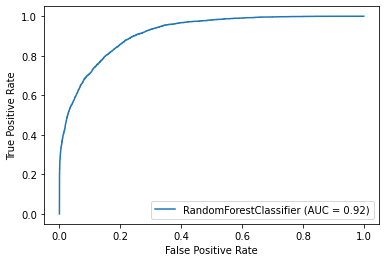

In [148]:
auc_RF = plot_roc_curve(RF_best, X_test, y_test).roc_auc

### XGBooost

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier

In [55]:
# Transform data to xgb format
X_train[categorical_vars] = X_train[categorical_vars].astype('str')
X_train[categorical_vars] = X_train[categorical_vars].apply(LabelEncoder().fit_transform)
X_test[categorical_vars] = X_test[categorical_vars].astype('str')
X_test[categorical_vars] = X_test[categorical_vars].apply(LabelEncoder().fit_transform)

In [56]:
# X_train_dm = xgb.DMatrix(data = X_train, label = y_train)
# X_test_dm = xgb.DMatrix(data = X_test, label = y_train)

In [123]:
# Try with default parameters
XGB = XGBClassifier(eval_metric = 'auc', use_label_encoder=False, random_state=42)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
acc_XGB = accuracy_score(y_test, y_pred_XGB)
print('ROC AUC score for default XGBoost model is', '{:.4f}'.format(acc_XGB))

ROC AUC score for default XGBoost model is 0.8708


C:\Users\wendy\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


C:\Users\wendy\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


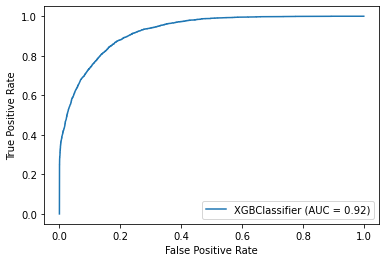

In [149]:
auc_XGB = plot_roc_curve(XGB, X_test, y_test).roc_auc

In [59]:
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=42)

In [60]:
print(XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


## Model Performance Comparison

In [150]:
model_names = pd.Series(['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost: default'])
acc = pd.Series([acc_logreg, acc_svc, acc_DT, acc_RF, acc_XGB])
auc = pd.Series([auc_logreg, auc_svc, auc_DT, auc_RF, auc_XGB])

report = pd.concat([model_names, acc, auc], axis = 1, 
                   keys = ['Model', 'Accuracy', 'Area Under Curve'])

In [151]:
report.sort_values('Area Under Curve', ascending = False)

,Model,Accuracy,Area Under Curve
4,XGBoost: default,0.870770,0.924840
3,Random Forest,0.864136,0.915937
2,Decision Tree,0.858178,0.903036
1,SVM,0.808058,0.828444
0,Logistic Regression,0.801548,0.820630


## Future Actions  
- Data Preprocessing 
    - Try imputing *workclass* and *country* with dominant values
    - Try one-hot encoding with VI analysis for categorical variables
    - Try resampling for more balanced input data
- Model Training
    - Fine tune XGBoost model for better performance
- Style and Compatability
    - Use pipeline for preprocessing